### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [2]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [4]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [5]:
data.shape 

(3256, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3256 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3256 non-null   float64
 1   High    3256 non-null   float64
 2   Low     3256 non-null   float64
 3   Close   3256 non-null   float64
 4   Volume  3256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 152.6 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,3.710604,3.784235,3.632463,3.704380,131832.353808
std,1.827700,1.863149,1.787076,1.822525,54227.259508
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691000,2.735000,2.643000,2.692000,92091.250000
50%,3.251500,3.300500,3.178000,3.238000,127025.000000
75%,4.155250,4.240250,4.064250,4.151000,161796.000000
max,13.580000,13.694000,13.304000,13.505000,459196.000000


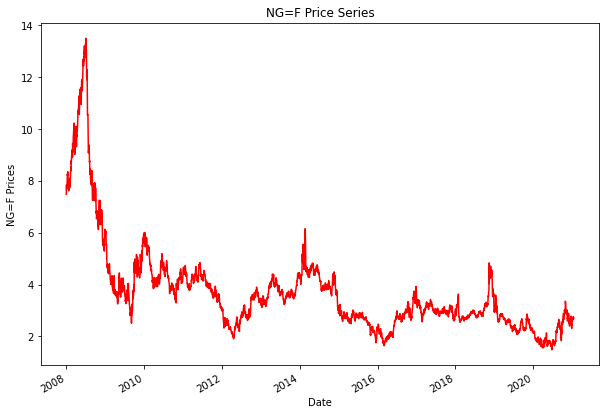

In [9]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

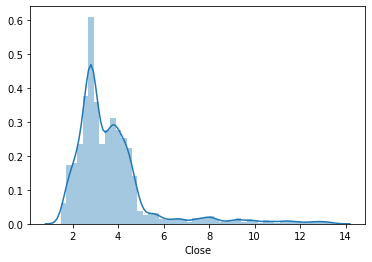

In [10]:
sns.distplot(data["Close"])

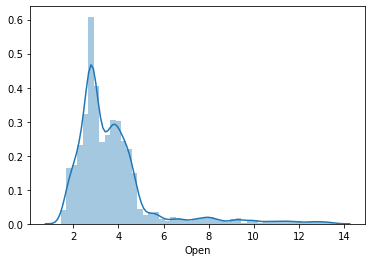

In [11]:
sns.distplot(data["Open"])

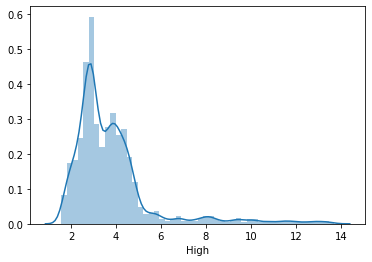

In [12]:
sns.distplot(data["High"])

In [13]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2604, 4)
(652, 4)
(2604,)
(652,)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [18]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.0014286570866125538
RMSE:-  0.0377975804333102
R2_score:-  0.9995022528240022


In [19]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [20]:
calculate_metrics(y_test, la_p)

MSE:-  0.26629003535723217
RMSE:-  0.5160329789434317
R2_score:-  0.9072239837414766


In [21]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0015451940592219476
RMSE:-  0.03930895647587134
R2_score:-  0.9994616510941965


In [23]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.092, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.057, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.061, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.077, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.045, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.092, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.057, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.061, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.078, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.019, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.023, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.024, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.009, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.027, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.237, total=   0.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.086, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.119, total=   1.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.173, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.018, total=   7.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.227, total=   9.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.332, total=   7.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.573, total=   8.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.985, total=   8.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.2min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [27]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")